In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import stumpy
from stumpy.core import z_norm
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

# Discovering time series reverse complements

This tutorial explores the **"Discovering time series reverse complements"** case study from the research paper:  
(The Swiss Army Knife of Time Series Data Mining: Ten Useful Things You Can Do with the Matrix Profile and Ten Lines of Code (see Section 3.3))[1]

Unlike Semordnilaps, which are “flipped” in the time axis, are there patterns that are flipped upsidedown in the value axis?  
We call such patterns **Time Series Reverse Complements (TSRCs)**.  
To understand TSRCs well, Here is simple cosine signal. We call left half (orange) A and right half (green) B.

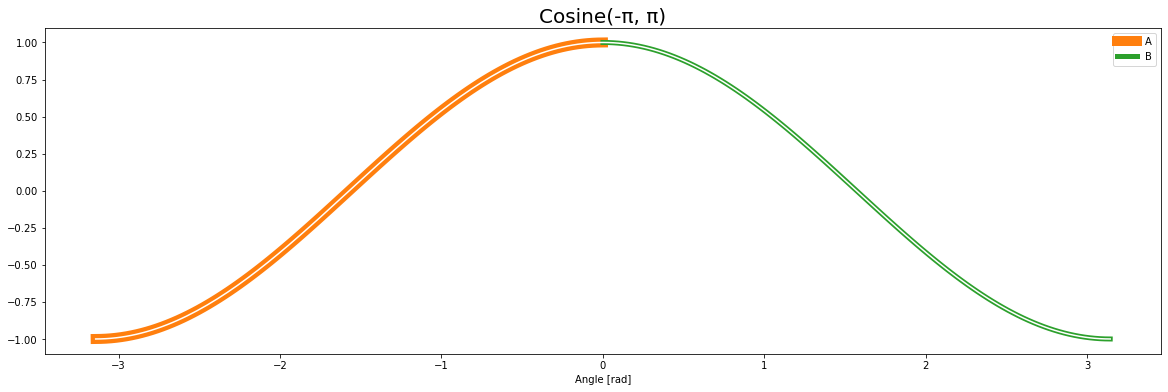

In [77]:
x = np.linspace(np.pi, -np.pi, 201)
x_A, x_B = np.linspace(-np.pi, 0, 100), np.linspace(0, np.pi, 100)
T_A, T_B = np.cos(x_A), np.cos(x_B)

plt.plot(x_A, T_A, color="C1", linewidth=10, label="A")
plt.plot(x_B, T_B, color="C2", linewidth=5, label="B")
plt.plot(x, np.cos(x), color="white")
plt.title("Cosine(-π, π)", fontsize=20)
plt.xlabel('Angle [rad]')
plt.legend()
plt.show()

TSRCs can be made sure by flipped sequence ($T_{flipped}$), and  
$T_{flipped}$ is simply calculated by $T_{flipped} = (-1) * T$ (T: Raw sequence).  
Let's comparing A with B by flipped sequence.

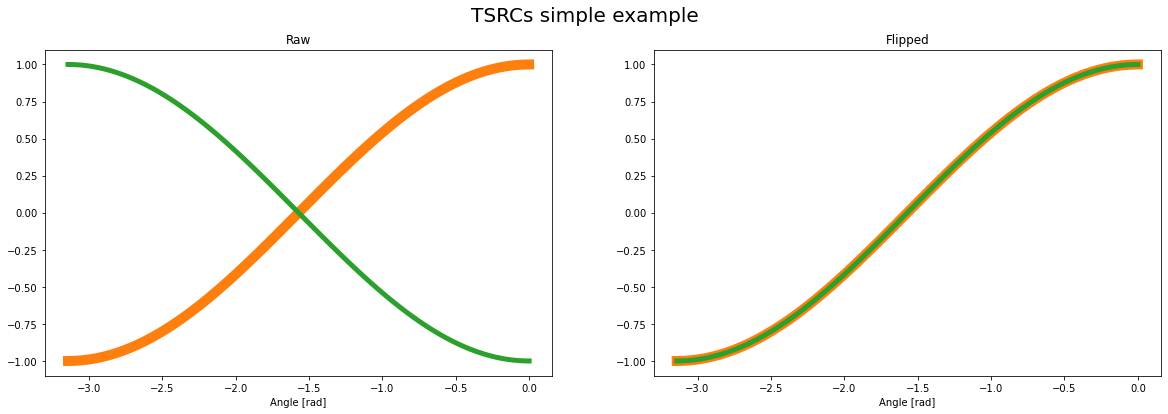

In [80]:
T_B_flipped = -1 * T_B

fig1, axs = plt.subplots(1, 2)
plt.suptitle('TSRCs simple example', fontsize='20')
axs[0].plot(x_A, T_A, linewidth=10, color="C1")
axs[0].plot(x_A, T_B, linewidth=5, color="C2")
axs[0].set_title("Raw")
axs[0].set_xlabel('Angle [rad]')

axs[1].plot(x_A, T_A, linewidth=10, color="C1")
axs[1].plot(x_A, T_B_flipped, linewidth=5, color="C2")
axs[1].set_title("Flipped")
axs[1].set_xlabel('Angle [rad]')

plt.show()


T_A and T_B_flipped are overlapped perfectly. The target of this paper is these kind of **reverse phenomenon**.

Here is approximately 2 min from a dataset from a hip-worn accelerometer of quotidian activity from USC-HAD Database (Zhang and Sawchuk 2012)[2].  
Data collection specification is sampling rate is 100Hz. 2min dataset should be 12000points.

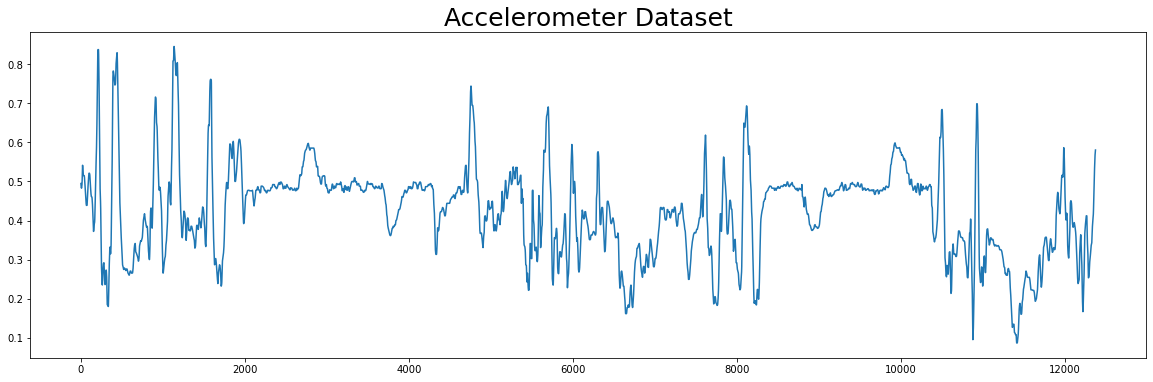

In [38]:
T = pd.read_pickle("dataset/33_1_2m.pkl")
plt.plot(T)
plt.title("Accelerometer Dataset", fontsize='25')
plt.show()

**Where is the best motif of length 20-s?** Let's calculate best motifs from this datset.  
`stumpy.stump` defaultly set parameter `normalize=True`.  
If it is True, matrix profile is calculated by z-normalizes subsequences.  
So top-1 motifs are plotted by z-normalized data and raw data.

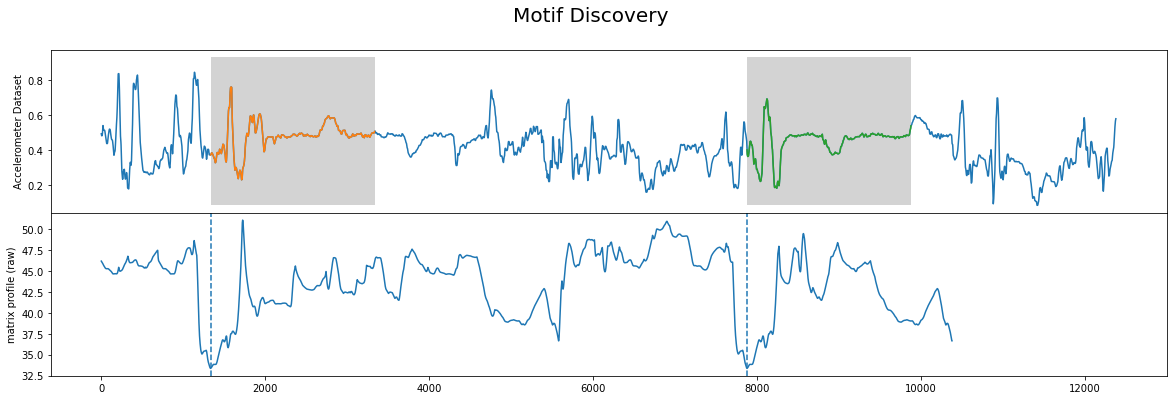

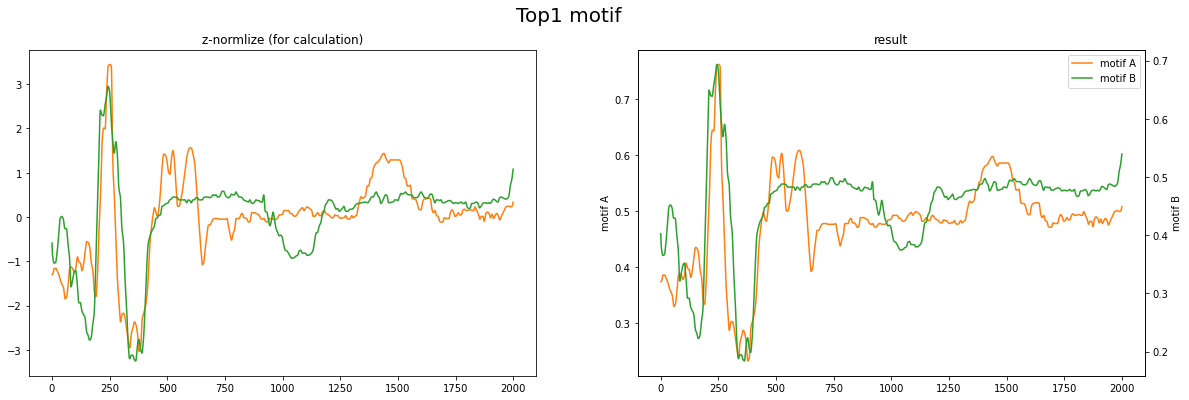

In [39]:
m = 2000
mp = stumpy.stump(T, m)
idx = np.argmin(mp[:, 0])
nn_idx = mp[:, 1][idx]
x = np.arange(len(T))

T_A, T_B = T[idx:idx+m], T[nn_idx:nn_idx+m]
T_Az, T_Bz = z_norm(T_A), z_norm(T_B)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif Discovery', fontsize='20')
axs[0].plot(T)
axs[0].plot(x[idx:idx+m], T_A)
axs[0].plot(x[nn_idx:nn_idx+m], T_B)
axs[0].set_ylabel("Accelerometer Dataset")
rect = Rectangle((idx, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nn_idx, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].plot(mp[:, 0])
axs[1].axvline(idx, linestyle="dashed")
axs[1].axvline(nn_idx, linestyle="dashed")
axs[1].set_ylabel("matrix profile (raw)")
plt.show()

fig1, axs = plt.subplots(1, 2)
plt.suptitle('Top1 motif', fontsize='20')
axs[0].plot(T_Az, color="C1")
axs[0].plot(T_Bz, color="C2")
axs[0].set_title("z-normlize (for calculation)")

axs_ = axs[1].twinx()
axs[1].plot(T_A, color="C1", label="motif A")
axs_.plot(T_B, color="C2", label="motif B")
axs[1].set_title("result")
h1, l1 = axs[1].get_legend_handles_labels()
h2, l2 = axs_.get_legend_handles_labels()
axs[1].legend(h1+h2, l1+l2, loc='upper right')
axs[1].set_ylabel("motif A")
axs_.set_ylabel("motif B")
plt.show()



The best motif of length 20-s is **not well conserved**, and almost looks like two random subsequences.  
This is unsurprising, apart from dance or athletic performances, we would not
expect human behavior to faithfully repeat over such an extended time scale.  

We also searched for the best **TSRC pattern** of the same length.

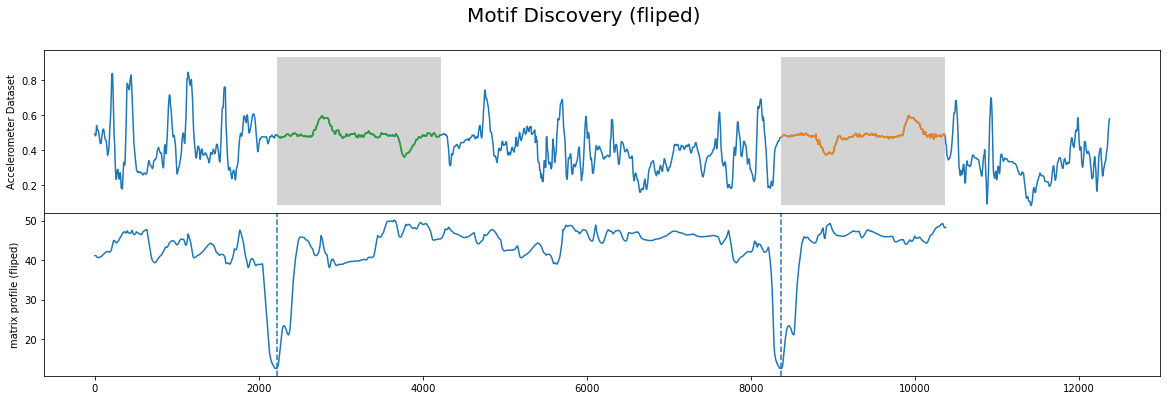

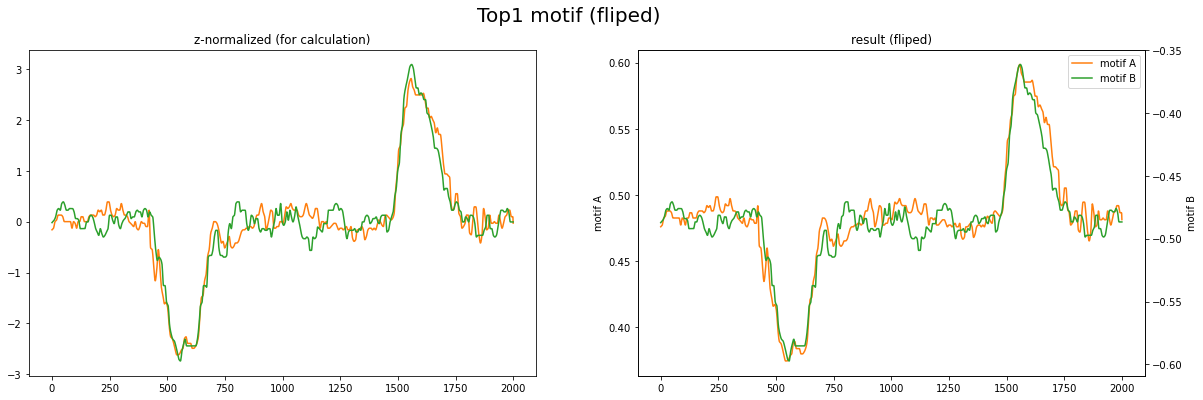

In [40]:
T_flipped = -1 * T
mp = stumpy.stump(T,  m, T_flipped, ignore_trivial=False)
idx = np.argmin(mp[:, 0])  # start index of motif
nn_idx = mp[:, 1][idx]  # start index of 1st nearest neighbor of motif

T_A, T_B = T[idx:idx+m], T_flipped[nn_idx:nn_idx+m]
T_Az, T_Bz = z_norm(T_A), z_norm(T_B)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif Discovery (fliped)', fontsize='20')
axs[0].plot(T)
axs[0].plot(x[idx:idx+m], T_A)
axs[0].plot(x[nn_idx:nn_idx+m], T[nn_idx:nn_idx+m])
axs[0].set_ylabel("Accelerometer Dataset")
rect = Rectangle((idx, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nn_idx, np.min(T)), m, np.max(T), facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].plot(mp[:, 0])
axs[1].axvline(idx, linestyle="dashed")
axs[1].axvline(nn_idx, linestyle="dashed")
axs[1].set_ylabel("matrix profile (fliped)")
plt.show()

fig1, axs = plt.subplots(1, 2)
plt.suptitle('Top1 motif (fliped)', fontsize='20')
axs[0].plot(T_Az, color="C1")
axs[0].plot(T_Bz, color="C2")
axs[0].set_title("z-normalized (for calculation)")

axs_ = axs[1].twinx()
axs[1].plot(T_A, color="C1", label="motif A")
axs_.plot(T_B, color="C2", label="motif B")
axs[1].set_title("result (fliped)")
h1, l1 = axs[1].get_legend_handles_labels()
h2, l2 = axs_.get_legend_handles_labels()
axs[1].legend(h1+h2, l1+l2, loc='upper right')
axs[1].set_ylabel("motif A")
axs_.set_ylabel("motif B")
plt.show()

Fliped series are stunningly well conserved.  

**What is the mechanism that produced this pattern**?  
At about 22 s into the recording, the user stepped into an elevator. The first bump is the “jolt” of the elevator ascending,  
followed by the “dip-and-recover” as the elevator decelerated the desired floor. 
After about 1 min, the user took a **return trip**, descending the same number of floors.


## References
[1]: [The Swiss Army Knife of Time Series Data Mining: Ten Useful Things You Can Do with the Matrix Profile and Ten Lines of Code (see Section 3.3)"](https://www.cs.ucr.edu/~eamonn/Top_Ten_Things_Matrix_Profile.pdf)  

[2]: [Zhang and Sawchuk 2012](https://sipi.usc.edu/had/)